In [19]:
import os
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# import plotting packages
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

# AOD bin test

In [12]:
def channal_text(ax, yloc, fontsize=10):
    channels_GOES = [
        [1,0.45,0.47,0.49,1],
        [2,0.59,0.64,0.69,0.5],
        [3,0.846,0.865,0.885,1],
        [4,1.371, 1.378,1.386,2],
        [5,1.58, 1.61, 1.64, 1],
        [6,2.225,2.25,2.275,2]
    ]
    for channel, lmbda_min, lmbda_center, lmbda_max,reso, in channels_GOES:
        color = '#252525'  # '#252525'
        # style 1 = 'dashed line'
        
        #ax.axvline(x=nu_center, color=color, linestyle='--', linewidth=0.8)
        
        # style 2 = 'shaded region'
        # lam = 1e4/nu # 1e4/um ->cm-1
        lam_center = 1e4/lmbda_center# * 1e3
        lam_min =1e4/ lmbda_max# * 1e3
        lam_max = 1e4/lmbda_min# * 1e3
        ax.axvspan(lam_min, lam_max, color='grey', alpha=0.3, lw=0)
        ax.text(lam_center, yloc, channel, fontsize=fontsize, color=color, horizontalalignment='center', zorder=5)
    return None

full spectral 194.02413515837557
full spectral 108.84157397300731
full spectral 79.5667091831541
full spectral 59.784140455149824
full spectral 57.50121620482876
full spectral 54.77584258520921


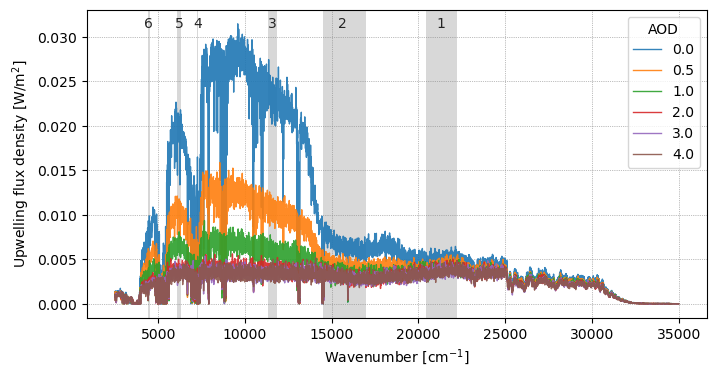

In [47]:
import sys, os,re

# Get the absolute path of the target directory
module_path = os.path.abspath(os.path.join('/home/dengnan/SW_RTM'))

# Add it to sys.path so Python knows to look there
if module_path not in sys.path:
    sys.path.insert(0, module_path)
from fun_nearealtime_RTM import goes_calinu

fdir = "/mnt/dengnan/AODcases/" 
Fls = os.listdir(fdir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls = [f for f in Fls if f.startswith('Results')]
Fls = np.sort(Fls)

bandmode = ['fullspectrum'] #'fullspectrum','channels']

AOD = []
for fl in Fls:
    match = re.search(r'_AOD=([\d.]+)', fl)
    if match:
        number = float(match.group(1))
        AOD.append(number)

#items = [0,1,2,6,5,4,3]
UW_sum=[]
fig = plt.figure(figsize=(8,4))
gs1 = gridspec.GridSpec(1, 1) 
gs1.update(wspace=0.1, hspace=0.15)
ax1 = fig.add_subplot(gs1[0])
nu0 = np.arange(2500, 35000, 3)
channels = ['C{:02d}'.format(c) for c in range(1, 6 + 1)]
for i in range(len(Fls)):
    if bandmode == 'channels':
        nu = goes_calinu(nu, channels, '/mnt/dengnan/', dnu=3)
    else:
        nu = nu0
    file = fdir + Fls[i]
    results = np.load(file, allow_pickle=True).item()
    Fuw_ctop=results.get('F_uw')
    ax1.plot(nu[::2], Fuw_ctop[::2], label=f'{AOD[i]}',linewidth=1,alpha=0.9)
    if bandmode == 'channels':
        print('spectral model',np.trapz(Fuw_ctop,nu))
    else:
        nu_input = goes_calinu(nu0, channels,  '/mnt/dengnan/', dnu=3)
        idx = np.nonzero(np.isin(nu0, nu_input))[0]
        print('full spectral',np.trapz(Fuw_ctop[idx],nu[idx]))
channal_text(ax1, yloc=0.031)
ax1.set_xlabel(r"Wavenumber [cm$^{-1}$]")

ax1.set_ylabel(r"Upwelling flux density [W/m$^2$]")
ax1.grid(color='grey', linestyle=':', linewidth=0.5)

ax1.legend(title = 'AOD', loc='upper right')#, ncol=1, columnspacing=0.5,handlelength=1.5,handletextpad=0.5)

figdir = '/home/dengnan/SW_RTM/figures/'
fig.savefig(figdir+'AOD_UW_ctop_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

full spectral 1005.2415267322467
full spectral 681.7268649506289
full spectral 442.4212408443723
full spectral 176.26594644755534
full spectral 68.9256828450754
full spectral 25.245261764763654


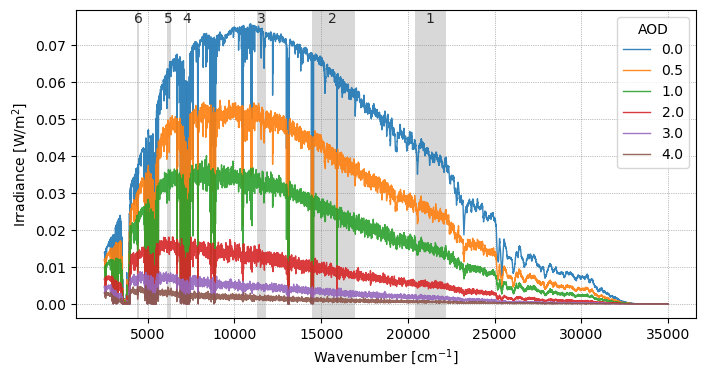

In [48]:
#items = [0,1,2,6,5,4,3]
UW_sum=[]
fig = plt.figure(figsize=(8,4))
gs1 = gridspec.GridSpec(1, 1) 
gs1.update(wspace=0.1, hspace=0.15)
ax1 = fig.add_subplot(gs1[0])
nu0 = np.arange(2500, 35000, 3)
for i in range(len(Fls)):
    if bandmode == 'channels':
        nu = goes_calinu(nu, channels, '/mnt/dengnan/', dnu=3)
    else:
        nu = nu0
    file = fdir + Fls[i]
    results = np.load(file, allow_pickle=True).item()
    Fuw_ctop=results.get('F_dw')
    ax1.plot(nu[::2], Fuw_ctop[::2], label=f'{AOD[i]}',linewidth=1,alpha=0.9)
    if bandmode == 'channels':
        print('spectral model',np.trapz(Fuw_ctop,nu))
    else:
        nu_input = goes_calinu(nu0, channels,  '/mnt/dengnan/', dnu=3)
        idx = np.nonzero(np.isin(nu0, nu_input))[0]
        print('full spectral',np.trapz(Fuw_ctop[idx],nu[idx]))
channal_text(ax1, yloc=0.076)
ax1.set_xlabel(r"Wavenumber [cm$^{-1}$]")

ax1.set_ylabel(r"Irradiance [W/m$^2$]")
ax1.grid(color='grey', linestyle=':', linewidth=0.5)

ax1.legend(title = 'AOD', loc='upper right')#, ncol=1, columnspacing=0.5,handlelength=1.5,handletextpad=0.5)
figdir = '/home/dengnan/SW_RTM/figures/'
fig.savefig(figdir+'AOD_GHI_ctop_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

# Table maker

In [20]:
!ls /mnt/dengnan/

abi_calibration  AODcases_Ta_rh_t0  LUTcases  RTM_10000
AODcases	 data		    RTM       RTM_output


In [21]:
fdir = "/mnt/dengnan/AODcases_Ta_rh_t0/" 
Fls = os.listdir(fdir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls = [f for f in Fls if f.startswith('Results')]
Fls = np.sort(Fls)
print(len(Fls))
Fls[:5]

3969


array(['Results_case2_RH=0.2_Tsurf=273_AOD=0.05_COD=0_th0=0.npy',
       'Results_case2_RH=0.2_Tsurf=273_AOD=0.05_COD=0_th0=15.npy',
       'Results_case2_RH=0.2_Tsurf=273_AOD=0.05_COD=0_th0=30.npy',
       'Results_case2_RH=0.2_Tsurf=273_AOD=0.05_COD=0_th0=45.npy',
       'Results_case2_RH=0.2_Tsurf=273_AOD=0.05_COD=0_th0=60.npy'],
      dtype='<U56')

In [22]:
import numpy as np
import pandas as pd
import re

# Step 1: Prepare your columns and lists
channels = ['C{:02d}'.format(c) for c in range(1, 7)]
Tsurf,RH, AOD, COD, th0 = [], [], [], [],[]

# We'll build a list of dicts, each one a row
data_rows = []

nu0 = np.arange(2500, 35000, 3)

for i in range(len(Fls)):
    fl = Fls[i]
    # Load data
    results = np.load(fdir+fl, allow_pickle=True).item()
    DNI = results.get('F_dni')
    DHI = results.get('F_dhi')
    #try:
    meta = {}
    meta['dni'] = np.trapz(DNI,nu0)
    meta['dhi'] = np.trapz(DHI,nu0)
    # Parse metadata from filename
    
    match = re.search(r'Tsurf=([\d.]+)', fl)
    if match: meta['Ta'] = float(match.group(1))

    match = re.search(r'RH=([\d.]+)', fl)
    if match: meta['rh'] = float(match.group(1))

    match = re.search(r'_AOD=([\d.]+)', fl)
    if match: meta['AOD'] = float(match.group(1))

    match = re.search(r'_COD=([\d.]+)', fl)
    if match: meta['COD'] = float(match.group(1))

    match = re.search(r'_th0=([\d.]+)', fl)
    if match: meta['th0'] = float(match.group(1))


    Fdw = results.get('F_dw')  # shape: (len(nu0), )
    meta['dsw'] = np.trapz(Fdw,nu0)

    data_rows.append(meta)
    # Step 2: Convert to pandas DataFrame
    df = pd.DataFrame(data_rows)
    # except Exception:
    #     print(i)
    # For each channel, extract F_channel and store mean or sum
#     for channel in channels:
#         nu_6c = goes_calinu(nu0, [channel], '/mnt/dengnan/', dnu=3)
#         idx = np.nonzero(np.isin(nu0, nu_6c))[0]
#         F_channel = Fdw[idx]

#         # You can change this to np.mean(), np.sum(), or something else
#         meta[channel] = np.mean(F_channel)

In [16]:
import numpy as np
import pandas as pd
import re

# Step 1: Prepare your columns and lists
channels = ['C{:02d}'.format(c) for c in range(1, 7)]
TWP, AOD, COD, th0 = [], [], [], []

# We'll build a list of dicts, each one a row
data_rows = []

nu0 = np.arange(2500, 35000, 3)

for i in range(len(Fls)):
    fl = Fls[i]
    
    # Parse metadata from filename
    meta = {}
    match = re.search(r'TPW=([\d.]+)', fl)
    if match: meta['TPW'] = float(match.group(1))

    match = re.search(r'_AOD=([\d.]+)', fl)
    if match: meta['AOD'] = float(match.group(1))

    match = re.search(r'_COD=([\d.]+)', fl)
    if match: meta['COD'] = float(match.group(1))

    match = re.search(r'_th0=([\d.]+)', fl)
    if match: meta['th0'] = float(match.group(1))

    # Load data
    results = np.load(fdir+fl, allow_pickle=True).item()
    Fdw = results.get('F_dw')  # shape: (len(nu0), )

    # For each channel, extract F_channel and store mean or sum
#     for channel in channels:
#         nu_6c = goes_calinu(nu0, [channel], '/mnt/dengnan/', dnu=3)
#         idx = np.nonzero(np.isin(nu0, nu_6c))[0]
#         F_channel = Fdw[idx]

#         # You can change this to np.mean(), np.sum(), or something else
#         meta[channel] = np.mean(F_channel)
    meta['dsw'] = np.trapz(Fdw,nu0)

    data_rows.append(meta)

# Step 2: Convert to pandas DataFrame
df = pd.DataFrame(data_rows)

In [23]:
df.describe()

,dni,dhi,Ta,rh,AOD,COD,th0,dsw
count,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.0,3969.000000,3969.000000
mean,269.062691,163.456618,295.809524,0.544444,0.605556,0.0,44.714286,432.519309
std,303.229072,115.689050,10.636498,0.245483,0.577637,0.0,29.580331,364.522774
min,0.000351,0.706160,273.000000,0.200000,0.050000,0.0,0.000000,0.706516
25%,11.667483,65.786609,288.000000,0.400000,0.200000,0.0,15.000000,86.404640
50%,150.390415,151.853579,298.000000,0.600000,0.400000,0.0,45.000000,388.387832
75%,475.468705,259.160802,304.000000,0.800000,0.800000,0.0,75.000000,732.032788
max,1062.192822,386.883757,312.000000,0.900000,2.000000,0.0,88.000000,1187.029819


In [24]:
df['dni'] = df['dni']/np.cos(np.deg2rad(df['th0']))

In [25]:
df.describe()

,dni,dhi,Ta,rh,AOD,COD,th0,dsw
count,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.0,3969.000000,3969.000000
mean,336.665779,163.456618,295.809524,0.544444,0.605556,0.0,44.714286,432.519309
std,336.763431,115.689050,10.636498,0.245483,0.577637,0.0,29.580331,364.522774
min,0.010062,0.706160,273.000000,0.200000,0.050000,0.0,0.000000,0.706516
25%,21.047821,65.786609,288.000000,0.400000,0.200000,0.0,15.000000,86.404640
50%,212.544588,151.853579,298.000000,0.600000,0.400000,0.0,45.000000,388.387832
75%,613.076584,259.160802,304.000000,0.800000,0.800000,0.0,75.000000,732.032788
max,1062.192822,386.883757,312.000000,0.900000,2.000000,0.0,88.000000,1187.029819


In [26]:
df.to_hdf('results_54layers_3_dsw_day_aods_ta_rh_th0.h5', key='data', mode='w')